In [70]:
# Python ODE solver

In SciPy, there are several built-in functions for solving initial value problems. The most common
function is the scipy.integrate.solve_ivp function.

The function, F(t, (S(t)) would be the derivative, dS(t)/dt.
and the initial condition is given with: S(t0) = S0 

The variable t is a one-dimensional independent variable (time), S(t) is an n-dimensional
vector-valued function (state), and F (t, S(t)) defines the differential equations; S0 is an initial
value for S. The function F must have the form dS = F (t, S), although the name does not have
to be F . The goal is to find the S(t) that approximately satisfies the differential equations given
the initial value S(t0 ) = S0

solve_ivp(fun, t_span, s0, method "RK45", t_eval=None) 

There
are a couple of methods to choose from: the default is “RK45”, which is the explicit Runge–Kutta
method of order 5(4).

In [71]:
# Que: F(t,s(t)) = ds/dt

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [73]:
plt.style.use("seaborn-poster")

In [74]:
%matplotlib inline

In [75]:
f = lambda t,s: np.cos(t)

In [76]:
t_eval = np.arange(0, np.pi, 0.1)
solve_ode = solve_ivp(f, [0, np.pi], [0], t_eval = t_eval)

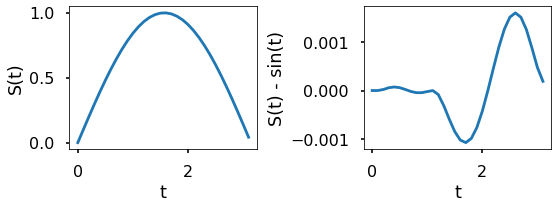

In [77]:
plt.figure(figsize = (8,3))
plt.subplot(121)
# "The x_axis info is being accessed with "fun.t" command, we can simply
# use the t_eval arrray instead
# y axis value, i.e. the solution array, is being accessed with "fun.y[0]"
plt.plot(solve_ode.t, solve_ode.y[0])
plt.xlabel("t")
plt.ylabel("S(t)")
plt.subplot(122)

plt.plot(solve_ode.t, solve_ode.y[0] - np.sin(solve_ode.t), label = "Difference between the solved and exact solution")
plt.xlabel("t")
plt.ylabel("S(t) - sin(t)")
plt.tight_layout()

In [78]:
print(solve_ode.y)

[[0.         0.09983342 0.19869022 0.29557795 0.3894921  0.4794848
  0.5646653  0.64419999 0.71731234 0.78328299 0.84144965 0.8912072
  0.9319568  0.96324802 0.98485892 0.99664808 0.99855345 0.99059238
  0.97286155 0.94553705 0.90887432 0.86320818 0.80895283 0.74660183
  0.67672811 0.59998398 0.51710113 0.4288906  0.33624283 0.24012761
  0.1415941  0.04177087]]


In [79]:
print(solve_ode.y[0])

[0.         0.09983342 0.19869022 0.29557795 0.3894921  0.4794848
 0.5646653  0.64419999 0.71731234 0.78328299 0.84144965 0.8912072
 0.9319568  0.96324802 0.98485892 0.99664808 0.99855345 0.99059238
 0.97286155 0.94553705 0.90887432 0.86320818 0.80895283 0.74660183
 0.67672811 0.59998398 0.51710113 0.4288906  0.33624283 0.24012761
 0.1415941  0.04177087]


In [80]:
print(solve_ode.y[0][0])

0.0


In [81]:
print(solve_ode.t)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1]


In [82]:
print(t_eval)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1]


In [83]:
# as we can see, "fun.t" array is same as grid "t_eval" created by us. 

In [84]:
if solve_ode.t.all() == t_eval.all():
    print ("Both are same")

Both are same


Using the rtol and atol to make the difference between the approximate and exact
solution less than 1e-7.

In [85]:
sol = solve_ivp(f, [0, np.pi], [0], t_eval=t_eval,rtol = 1e-8, atol = 1e-8)

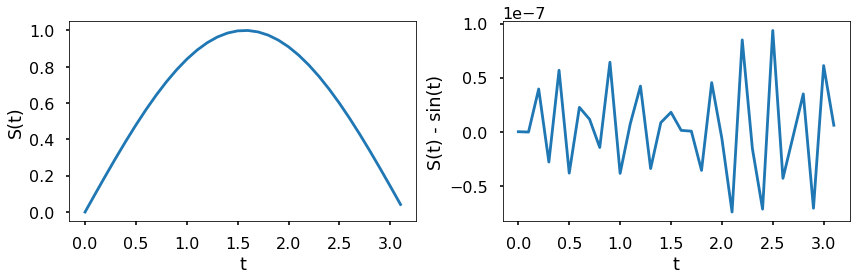

In [86]:
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel("t")
plt.ylabel("S(t)")
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel("t")
plt.ylabel("S(t) - sin(t)")
plt.tight_layout()